<a href="https://colab.research.google.com/github/AlexTaliotis/Supply-Chain-Risk-Dissertation/blob/main/General_Substitutability_Calculator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Data analysis pre-section - do it for all individual firms (change filepath and run pre-section to see if there are data problems)**

Toyota

In [ ]:
file_path = '/content/drive/My Drive/DISS DATA/BoL_Toyota.xlsx'
df = pd.read_excel(file_path)
print(df.head())
# Convert "Arrival Date" to a proper datetime
df['Arrival Date'] = pd.to_datetime(df['Arrival Date'], errors='coerce')

# Drop any rows without a valid date
df = df.dropna(subset=['Arrival Date'])
# ========== 2. DEFINE QUARTER COLUMN ==========
df['Quarter'] = df['Arrival Date'].dt.to_period('Q')

# ========== 3. SUM TOTAL VOLUME PER (QUARTER, HS CODE) ==========
# We'll call the columns "Quantity" or "Volume" depending on your dataset.
# Modify if you use "Weight" or something else.

group_total = (df
   .groupby(['Quarter', 'HS Code'], as_index=False)
   .agg(TotalVolume=('Quantity', 'sum'),FullDescription=('HS Code Full Description', 'first'))
)

print(group_total.head(500000))

  Arrival Date                         Company Name  \
0   2024-09-29               Toyota Motor Sales Usa   
1   2024-09-29               Toyota Motor Sales Usa   
2   2024-09-29  Bastian Solutions Llc I A Toyota Ad   
3   2024-09-29      Toyota Tsusho Nexty Electronics   
4   2024-09-28          Southern States Toyota Lift   

                     Supplier Name  \
0                Toyota Motor Corp   
1                Toyota Motor Corp   
2                Autostore Sp Zo O   
3  Toyota Tsusho Nexty Electronics   
4                    Combilift Ulc   

                          Product Description  \
0  Toyota Passenger Vehicle Emergency Contact   
1    Lexus Passenger Vehicle Emergencycontact   
2                                       Piece   
3      Unpopulated Bare Printed Circuit Board   
4                                   Forklifts   

                   Destination Port Departure Port Supplier Country  TEU  \
0                  Jacksonville, Fl       Gamagori            Japan  

Ford Motor COmpany

In [ ]:
file_path = '/content/drive/My Drive/DISS DATA/Ford Motor Company-10-19-2024.xlsx'
df1 = pd.read_excel(file_path)
file_path = '/content/drive/My Drive/DISS DATA/Ford Motor Company-10-19-2024 (1).xlsx'
df2 = pd.read_excel(file_path)
# Concatenate both datasets
df = pd.concat([df1, df2], ignore_index=True)
# Step 2: Convert "Arrival Date" to a proper datetime
df['Arrival Date'] = pd.to_datetime(df['Arrival Date'], errors='coerce')

# Drop any rows without a valid date
df = df.dropna(subset=['Arrival Date'])

print(df['Arrival Date'].dtypes)
# ========== 3. DEFINE QUARTER COLUMN ==========
df['Quarter'] = df['Arrival Date'].dt.to_period('Q')
# ========== 3. SUM TOTAL VOLUME PER (QUARTER, HS CODE) ==========
# We'll call the columns "Quantity" or "Volume" depending on your dataset.
# Modify if you use "Weight" or something else.

group_total = (df
   .groupby(['Quarter', 'HS Code'], as_index=False)
   .agg(TotalVolume=('Quantity', 'sum'),FullDescription=('HS Code Full Description', 'first'))
)
print(group_total.head(500000))

datetime64[ns]
     Quarter   HS Code  TotalVolume  \
0     2015Q1   30613.0         26.0   
1     2015Q1   40390.0        222.0   
2     2015Q1   40510.0         30.0   
3     2015Q1   40590.0         56.0   
4     2015Q1   91091.0         20.0   
...      ...       ...          ...   
4732  2024Q3  930610.0        762.0   
4733  2024Q3  940190.0         19.0   
4734  2024Q3  940350.0         54.0   
4735  2024Q3  960321.0          3.0   
4736  2024Q3  981800.0        400.0   

                                        FullDescription  
0     Fish and crustaceans, molluscs and other aquat...  
1     Dairy produce; birds eggs; natural honey; edib...  
2     Dairy produce; birds eggs; natural honey; edib...  
3     Dairy produce; birds eggs; natural honey; edib...  
4     Coffee, tea, maté and spices ; Ginger, saffron...  
...                                                 ...  
4732  Arms and ammunition; parts and accessories the...  
4733  Furniture; bedding, mattresses, mattress suppo

Tesla

In [ ]:
file_path = '/content/drive/My Drive/DISS DATA/Tesla_BoL_Dataset.xlsx'
df = pd.read_excel(file_path)
print(df.head())
# Convert "Arrival Date" to a proper datetime
df['Arrival Date'] = pd.to_datetime(df['Arrival Date'], errors='coerce')

# Drop any rows without a valid date
df = df.dropna(subset=['Arrival Date'])
# ========== 2. DEFINE QUARTER COLUMN ==========
df['Quarter'] = df['Arrival Date'].dt.to_period('Q')

# ========== 3. SUM TOTAL VOLUME PER (QUARTER, HS CODE) ==========
# We'll call the columns "Quantity" or "Volume" depending on your dataset.
# Modify if you use "Weight" or something else.

group_total = (df
   .groupby(['Quarter', 'HS Code'], as_index=False)
   .agg(TotalVolume=('Quantity', 'sum'),FullDescription=('HS Code Full Description', 'first'))
)

print(group_total.head(500000))

  Arrival Date Company Name                            Supplier Name  \
0   2024/09/28    Tesla Inc  Panasonic Operational Excellence Co Ltd   
1   2024/09/28    Tesla Inc                        Daehyun St Co Ltd   
2   2024/09/28    Tesla Inc  Panasonic Operational Excellence Co Ltd   
3   2024/09/28    Tesla Inc  Panasonic Operational Excellence Co Ltd   
4   2024/09/28    Tesla Inc                    Posco Future M Co Ltd   

          Product Description Destination Port Departure Port  \
0       Separator Film Pervio  Los Angeles, Ca          Pusan   
1  Single Sided Adhesive Tape  Los Angeles, Ca          Pusan   
2       Separator Film Pervio  Los Angeles, Ca          Pusan   
3                         NaN  Los Angeles, Ca          Pusan   
4                Anode Active  Los Angeles, Ca          Pusan   

    Supplier Country  TEU  Weight  Containers Count  ...  \
0  Republic Of Korea  3.0   15123                 2  ...   
1  Republic Of Korea  1.5    5565                 1  ...

Nissan

In [ ]:
file_path = '/content/drive/My Drive/DISS DATA/BoL_Nissan.xlsx'
df = pd.read_excel(file_path)
print(df.head())
# Convert "Arrival Date" to a proper datetime
df['Arrival Date'] = pd.to_datetime(df['Arrival Date'], errors='coerce')

# Drop any rows without a valid date
df = df.dropna(subset=['Arrival Date'])
# ========== 2. DEFINE QUARTER COLUMN ==========
df['Quarter'] = df['Arrival Date'].dt.to_period('Q')

# ========== 3. SUM TOTAL VOLUME PER (QUARTER, HS CODE) ==========
# We'll call the columns "Quantity" or "Volume" depending on your dataset.
# Modify if you use "Weight" or something else.

group_total = (df
   .groupby(['Quarter', 'HS Code'], as_index=False)
   .agg(TotalVolume=('Quantity', 'sum'),FullDescription=('HS Code Full Description', 'first'))
)

print(group_total.head(500000))

          Arrival Date               Company Name         Supplier Name  \
0           11/13/2024  Nissan North America Inc   Nissan Motor Co Ltd    
1           11/13/2024  Nissan North America Inc   Nissan Motor Co Ltd    
2           11/13/2024  Nissan North America Inc   Nissan Motor Co Ltd    
3  2024-04-11 00:00:00  Nissan North America Inc   Nissan Motor Co Ltd    
4  2024-04-11 00:00:00  Nissan North America Inc   Nissan Motor Co Ltd    

                                 Product Description Destination Port  \
0  Nissan Motor Vehicles Emerge Ncy Contact Chemt...   Long Beach, Ca   
1  Nissan Motor Vehicles Emerge Ncy Contact Chemt...   Long Beach, Ca   
2  Nissan Motor Vehicles Emerge Ncy Contact Chemt...   Long Beach, Ca   
3  Nissan Motor Vehicles Emerge Ncy Contact Chemt...  Los Angeles, Ca   
4  Nissan Motor Vehicles Emerge Ncy Contact Chemt...  Los Angeles, Ca   

  Departure Port Supplier Country  HS Code  \
0       YANGSHAN            Japan  8703.24   
1       YANGSHAN  

Mazda

In [ ]:
file_path = '/content/drive/My Drive/DISS DATA/BoL_Mazda.xlsx'
df = pd.read_excel(file_path)
print(df.head())
# Convert "Arrival Date" to a proper datetime
df['Arrival Date'] = pd.to_datetime(df['Arrival Date'], errors='coerce')

# Drop any rows without a valid date
df = df.dropna(subset=['Arrival Date'])
# ========== 2. DEFINE QUARTER COLUMN ==========
df['Quarter'] = df['Arrival Date'].dt.to_period('Q')

# ========== 3. SUM TOTAL VOLUME PER (QUARTER, HS CODE) ==========
# We'll call the columns "Quantity" or "Volume" depending on your dataset.
# Modify if you use "Weight" or something else.

group_total = (df
   .groupby(['Quarter', 'HS Code'], as_index=False)
   .agg(TotalVolume=('Quantity', 'sum'),FullDescription=('HS Code Full Description', 'first'))
)

print(group_total.head(500000))

          Arrival Date                 Company Name      Supplier Name  \
0  2024-12-12 00:00:00  Mazda Motor Of America Inc   Mazda Motor Corp    
1  2024-12-12 00:00:00  Mazda Motor Of America Inc   Mazda Motor Corp    
2  2024-12-12 00:00:00  Mazda Motor Of America Inc   Mazda Motor Corp    
3  2024-12-12 00:00:00  Mazda Motor Of America Inc   Mazda Motor Corp    
4  2024-12-12 00:00:00  Mazda Motor Of America Inc   Mazda Motor Corp    

             Product Description Destination Port Departure Port  \
0                     Automotive   Charleston, Sc          Pusan   
1            Gear Motor Vehicles   Charleston, Sc          Pusan   
2             Automotive Vehicle   Charleston, Sc          Pusan   
3                           Gear   Charleston, Sc          Pusan   
4  Automotive Vehicle Production   Charleston, Sc          Pusan   

  Supplier Country  HS Code  \
0            Japan   8415.9   
1            Japan   8708.4   
2            Japan   8415.9   
3            Japan   8

Mercedes Benz


In [ ]:
file_path = '/content/drive/My Drive/DISS DATA/BoL_Mercedes_Benz.xlsx'
df = pd.read_excel(file_path)
print(df.head())
# Convert "Arrival Date" to a proper datetime
df['Arrival Date'] = pd.to_datetime(df['Arrival Date'], errors='coerce')

# Drop any rows without a valid date
df = df.dropna(subset=['Arrival Date'])
# ========== 2. DEFINE QUARTER COLUMN ==========
df['Quarter'] = df['Arrival Date'].dt.to_period('Q')

# ========== 3. SUM TOTAL VOLUME PER (QUARTER, HS CODE) ==========
# We'll call the columns "Quantity" or "Volume" depending on your dataset.
# Modify if you use "Weight" or something else.

group_total = (df
   .groupby(['Quarter', 'HS Code'], as_index=False)
   .agg(TotalVolume=('Quantity', 'sum'),FullDescription=('HS Code Full Description', 'first'))
)

print(group_total.head(500000))

          Arrival Date            Company Name        Supplier Name  \
0  2024-12-12 00:00:00  Mercedes Benz Usa Llc     Mercedes Benz Ag    
1  2024-12-12 00:00:00  Mercedes Benz Usa Llc      Daimler Ag Werk    
2  2024-12-12 00:00:00  Mercedes Benz Usa Llc   Daimler Ag Werk011    
3  2024-11-12 00:00:00  Mercedes Benz Usa Llc     Mercedes Benz Ag    
4  2024-11-12 00:00:00  Mercedes Benz Usa Llc     Mercedes Benz Ag    

                                 Product Description Destination Port  \
0  Sprinter Sprinter Sprinter Sprinter Sprinter S...   Charleston, Sc   
1  Mercedes Benz Passenger Cars Mercedes Benz Pas...   Long Beach, Ca   
2  Mercedes Benz Passenger Cars Mercedes Benz Pas...   Long Beach, Ca   
3  Technology Technology Technology Technology Te...    Baltimore, Md   
4                                          Cle Matic    Baltimore, Md   

  Departure Port Supplier Country  HS Code  \
0    Bremerhaven          Germany      NaN   
1    Bremerhaven          Germany  4012.11

Honda


In [ ]:
file_path = '/content/drive/My Drive/DISS DATA/BoL_Honda_data.xlsx'
df = pd.read_excel(file_path)
print(df.head())
# Convert "Arrival Date" to a proper datetime
df['Arrival Date'] = pd.to_datetime(df['Arrival Date'], errors='coerce')

# Drop any rows without a valid date
df = df.dropna(subset=['Arrival Date'])
# ========== 2. DEFINE QUARTER COLUMN ==========
df['Quarter'] = df['Arrival Date'].dt.to_period('Q')

# ========== 3. SUM TOTAL VOLUME PER (QUARTER, HS CODE) ==========
# We'll call the columns "Quantity" or "Volume" depending on your dataset.
# Modify if you use "Weight" or something else.

group_total = (df
   .groupby(['Quarter', 'HS Code'], as_index=False)
   .agg(TotalVolume=('Quantity', 'sum'),FullDescription=('HS Code Full Description', 'first'))
)

print(group_total.head(500000))

          Arrival Date                  Company Name  \
0           11/30/2024      American Honda Motor Co    
1           10/24/2024  American Honda Motor Co Inc    
2           10/20/2024  American Honda Motor Co Inc    
3  2024-05-10 00:00:00  American Honda Motor Co Inc    
4           09/25/2024  American Honda Motor Co Inc    

                  Supplier Name     Product Description Destination Port  \
0                   Brembo N V               Spring Kit     New York, Ny   
1  Moto Honda Da Amazonia Ltda              Motorcycles   Charleston, Sc   
2  Moto Honda Da Amazonia Ltda              Motorcycles   Charleston, Sc   
3  Moto Honda Da Amazonia Ltda              Motorcycles      Seattle, Wa   
4  Moto Honda Da Amazonia Ltda   Motocycles Motorcycles  Los Angeles, Ca   

  Departure Port Supplier Country  HS Code  \
0          Genoa            Italy  8708.30   
1         Manaus           Brazil  8714.11   
2         Manaus           Brazil  8714.11   
3         Manaus      

BMW


In [ ]:
file_path = '/content/drive/My Drive/DISS DATA/BMW_BoL_data.xlsx'
df = pd.read_excel(file_path)
print(df.head())
# Convert "Arrival Date" to a proper datetime
df['Arrival Date'] = pd.to_datetime(df['Arrival Date'], errors='coerce')

# Drop any rows without a valid date
df = df.dropna(subset=['Arrival Date'])
# ========== 2. DEFINE QUARTER COLUMN ==========
df['Quarter'] = df['Arrival Date'].dt.to_period('Q')

# ========== 3. SUM TOTAL VOLUME PER (QUARTER, HS CODE) ==========
# We'll call the columns "Quantity" or "Volume" depending on your dataset.
# Modify if you use "Weight" or something else.

group_total = (df
   .groupby(['Quarter', 'HS Code'], as_index=False)
   .agg(TotalVolume=('Quantity', 'sum'),FullDescription=('HS Code Full Description', 'first'))
)

print(group_total.head(500000))

  Arrival Date               Company Name                    Supplier Name  \
0   12/29/2024  Bmw Of North America Llc   Bayerische Motoren Werke Ag Vt    
1   12/29/2024  Bmw Of North America Llc               Bmw Slp S A De C V    
2   12/29/2024    Bmw Manufacturing Corp                  Ebz Systec Gmbh    
3   12/29/2024  Bmw Of North America Llc   Bayerische Motoren Werke Ag Vt    
4   12/27/2024    Bmw Manufacturing Corp            Zf Friedrichshafen Ag    

                                 Product Description  \
0  Bmw Service Bmw Service Bmw Service Bmw Servic...   
1                                       Bmw Vehicles   
2  Other Machines Existing Linefor Residential We...   
3  Bmw Service Bmw Service Bmw Service Bmw Servic...   
4                                     Bmw Automotive   

                   Destination Port Departure Port Supplier Country  HS Code  \
0                       Houston, Tx  Wilhelmshaven          Germany  8431.39   
1  New York/Newark Area, Newark, N

General Motors


In [ ]:
file_path = '/content/drive/My Drive/DISS DATA/GM_full_data.xlsx'
df = pd.read_excel(file_path)
print(df.head())

          Arrival Date         Company Name              Supplier Name  \
0  2024-04-12 00:00:00  General Motors Llc   Dong Il Aluminium Co Ltd    
1  2024-04-12 00:00:00  General Motors Llc   Ceva Logistics Korea Inc    
2  2024-04-12 00:00:00  General Motors Llc     Sam A Aluminium Co Ltd    
3  2024-04-12 00:00:00  General Motors Llc      Posco Future M Co Ltd    
4  2024-04-12 00:00:00  General Motors Llc      Posco Future M Co Ltd    

                                 Product Description Destination Port  \
0                   Aluminium Foil Dia Dia Lane Krus       Tacoma, Wa   
1  Automotive Bolts Actual Shpr Iljin Global Hani...   Long Beach, Ca   
2                           Aluminium Foil Lane Krus       Tacoma, Wa   
3  Natural Graphite Anode Active Ciplinvula Lane ...       Tacoma, Wa   
4  Natural Graphite Anode Active Ciplinvula Lane ...       Tacoma, Wa   

  Departure Port   Supplier Country  HS Code HS Code Description  \
0          Pusan  Republic Of Korea  7410.22    

In [ ]:
# Convert "Arrival Date" to a proper datetime
df['Arrival Date'] = pd.to_datetime(df['Arrival Date'], errors='coerce')

# Drop any rows without a valid date
df = df.dropna(subset=['Arrival Date'])

In [ ]:
print(df['Arrival Date'].dtypes)


datetime64[ns]


In [ ]:
# ========== 2. DEFINE QUARTER COLUMN ==========
df['Quarter'] = df['Arrival Date'].dt.to_period('Q')

In [ ]:
# ========== 3. SUM TOTAL VOLUME PER (QUARTER, HS CODE) ==========
# We'll call the columns "Quantity" or "Volume" depending on your dataset.
# Modify if you use "Weight" or something else.

group_total = (df
   .groupby(['Quarter', 'HS Code'], as_index=False)
   .agg(TotalVolume=('Quantity', 'sum'),FullDescription=('HS Code Full Description', 'first'))
)

In [ ]:
print(group_total.head(500000))

     Quarter  HS Code  TotalVolume  \
0     2015Q1  2620.60            6   
1     2015Q1  2932.12            3   
2     2015Q1  3105.10          107   
3     2015Q1  4007.00           20   
4     2015Q1  4011.40           31   
...      ...      ...          ...   
3971  2024Q4  9603.10         1248   
3972  2024Q4  9603.21            1   
3973  2024Q4  9606.10            1   
3974  2024Q4  9706.00          562   
3975  2024Q4  9810.00          161   

                                        FullDescription  
0     Ores, slag and ash ; Slag, ash and residues (o...  
1     Organic chemicals ; Heterocyclic compounds wit...  
2     Fertilizers ; Mineral or chemical fertilizers ...  
3     Rubber and articles thereof ; Vulcanized rubbe...  
4     Rubber and articles thereof ; New pneumatic ti...  
...                                                 ...  
3971  Miscellaneous manufactured articles ; Brooms, ...  
3972  Miscellaneous manufactured articles ; Brooms, ...  
3973  Miscellaneous m

# **Data confirmation pre-section ends here**

Part A: Computing Sikgt

In [ ]:
# ========== 3. DEFINE QUARTER COLUMN ==========
df['Quarter'] = df['Arrival Date'].dt.to_period('Q')

# ========== 3. SUM TOTAL VOLUME PER (QUARTER, HS CODE) ==========
# We'll call the columns "Quantity" or "Volume" depending on your dataset.
# Modify if you use "Weight" or something else.

group_total = (df
   .groupby(['Quarter', 'HS Code'], as_index=False)
   .agg(TotalVolume=('Quantity', 'sum'),FullDescription=('HS Code Full Description', 'first'))
)

#print(group_total.head(500000))

# ========== 4. SUPPLIER-LEVEL VOLUME PER (QUARTER, HS CODE, SUPPLIER) ==========
group_supplier = (df
   .groupby(['Quarter', 'HS Code', 'Supplier Name'], as_index=False)
   .agg(SupplierVolume=('Quantity', 'sum'))
)


In [ ]:
# ========== 5. MERGE & COMPUTE s_{k}^g(t) ==========
merged = pd.merge(
    group_supplier,         # has SupplierVolume
    group_total,            # has TotalVolume
    on=['Quarter','HS Code'],
    how='left'
)

# s_{k}^g(t) = SupplierVolume / TotalVolume
merged['s_k^g(t)'] = merged['SupplierVolume'] / merged['TotalVolume']

# s_{k}^g(t) ^ 2 = HH index
merged['s_k^g(t)'] = merged['s_k^g(t)'] ** 2

#print(merged[['Quarter', 'HS Code', 'Supplier Name', 's_k^g(t)']])
 #this is per product sikg(t) - treating all comapny subitiaries as i

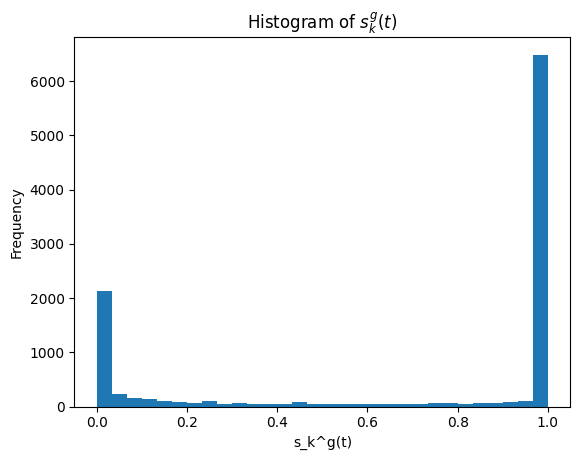

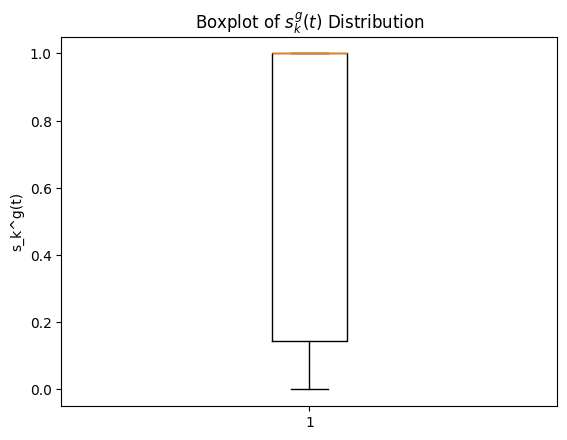

In [ ]:
import matplotlib.pyplot as plt

# Make sure you’ve computed s_k^g(t) already, e.g.
# merged['s_k^g(t)'] = (merged['SupplierVolume'] / merged['TotalVolume'])**2

# Histogram
plt.figure()
plt.hist(merged['s_k^g(t)'].dropna(), bins=30)
plt.xlabel('s_k^g(t)')
plt.ylabel('Frequency')
plt.title('Histogram of $s_k^g(t)$')
plt.show()

# Box‐plot
plt.figure()
plt.boxplot(merged['s_k^g(t)'].dropna())
plt.ylabel('s_k^g(t)')
plt.title('Boxplot of $s_k^g(t)$ Distribution')
plt.show()


## *Part B: Creating wgg' for all products

Note: In your analysis mention that the amount of unique products per importer are around 900-1000 which is a good indication of the product variation required in the business and we can infer on the power of the local supply chain of a company given the variability of it's internaitonal imports. i.e if a firm imports more externally it could be that it ischeaper (which carries a tarrif cost OR that it's local supply chain and production capabilities are more resilient and cover more stuff)

In [ ]:
###########################
# 1) LOAD AND PREP DATA   #
###########################

# Assume your DataFrame is `df` with columns:
#   'HS Code' and 'HS code Full Description'
# First, get a unique list of (HS Code, Description).
df_codes = df[['HS Code','HS Code Full Description']].drop_duplicates(subset=['HS Code'])

# Build a dictionary: {HS_code: description_text}.
desc_dict = dict(zip(df_codes['HS Code'], df_codes['HS Code Full Description']))

#print(len(desc_dict))

In [ ]:
import torch
from transformers import AutoTokenizer, AutoModel

#1. Setting up the model. I am using BERT for now
model_name = "bert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_name)
model.eval()  # We only need inference

def get_bert_embedding(text):
    inputs = tokenizer(text, return_tensors="pt", truncation=True, max_length=128)
    with torch.no_grad():
        outputs = model(**inputs)
    # outputs.last_hidden_state shape: [batch_size, seq_length, hidden_dim]
    # We take the [CLS] token at index 0 to represent the entire text
    cls_vec = outputs.last_hidden_state[:, 0, :]
    return cls_vec.squeeze(0)  # shape: [hidden_dim]

#this computes dot product and divides by L2 to get the cosine similarity e{-1,1} aka how similary two unique descriptions of hs codes are
def cosine_sim(vec1, vec2):
    dot_val = torch.dot(vec1, vec2)
    norm_val = vec1.norm(p=2) * vec2.norm(p=2)
    return (dot_val / norm_val).item()

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

In [ ]:
hs_codes = list(desc_dict.keys())  # e.g. [370220.0, 590610.0, 853649.0, ...]
n = len(hs_codes)

# Precompute embeddings for each unique HS Code
embeddings = {}
for code in hs_codes:
    text = str(desc_dict[code])  # in case of NaNs
    embeddings[code] = get_bert_embedding(text)

# Create an n x n array for pairwise similarities
W = np.zeros((n, n), dtype=float)

for i in range(n):
    for j in range(n):
        if i == j:
            W[i,j] = 1.0
        else:
            v1 = embeddings[hs_codes[i]]
            v2 = embeddings[hs_codes[j]]
            W[i,j] = cosine_sim(v1, v2)

In [ ]:
print(W[:10, :10])
#non-normalized

[[1.         0.88680631 0.82471246 0.89456731 0.41147912 0.87856817
  0.89098638 0.80200565 0.85246736 0.91774791]
 [0.88680631 1.         0.79446977 0.86247724 0.36408794 0.84739739
  0.84004557 0.75308758 0.80683708 0.87492293]
 [0.82471246 0.79446977 1.         0.79120731 0.59025979 0.84405535
  0.82644683 0.74657667 0.77254122 0.79235691]
 [0.89456731 0.86247724 0.79120731 1.         0.36277589 0.86802965
  0.91358352 0.76258808 0.88472325 0.93467832]
 [0.41147912 0.36408794 0.59025979 0.36277589 1.         0.50460631
  0.38236484 0.320526   0.45026556 0.30149758]
 [0.87856817 0.84739739 0.84405535 0.86802965 0.50460631 1.
  0.83039087 0.72463679 0.81605703 0.85820359]
 [0.89098638 0.84004557 0.82644683 0.91358352 0.38236484 0.83039087
  1.         0.8023653  0.89997232 0.89401174]
 [0.80200565 0.75308758 0.74657667 0.76258808 0.320526   0.72463679
  0.8023653  1.         0.74355    0.78866482]
 [0.85246736 0.80683708 0.77254122 0.88472325 0.45026556 0.81605703
  0.89997232 0.74355

In [ ]:
#normalization {0,1}
W_min, W_max = W.min(), W.max()
W_norm = (W - W_min)/(W_max - W_min)
#This is mix max normalization which is not good since the rows do not sum up to 1 as ALberto wanted

# 3. Convert back to a DataFrame, if desired
similarity_df_row_norm = pd.DataFrame(
    W_norm,
    index=hs_codes,     # same row labels
    columns=hs_codes    # same column labels
)

# Quick check that each row sums to ~1
print(similarity_df_row_norm.sum(axis=1))

print(similarity_df_row_norm.head(927))


900130.0    1088.280296
841830.0    1034.155505
210500.0    1013.459563
853890.0    1049.664561
0.0          465.560976
               ...     
13000.0      734.149367
920930.0    1056.673669
610520.0    1032.661273
846722.0    1097.214555
30760.0      971.568778
Length: 1302, dtype: float64
          900130.0  841830.0  210500.0  853890.0  0.0       870839.0  \
900130.0  1.000000  0.872660  0.802805  0.881390  0.337928  0.863392   
841830.0  0.872660  1.000000  0.768783  0.845290  0.284614  0.828325   
210500.0  0.802805  0.768783  1.000000  0.765113  0.539052  0.824566   
853890.0  0.881390  0.845290  0.765113  1.000000  0.283138  0.851536   
0.0       0.337928  0.284614  0.539052  0.283138  1.000000  0.442694   
...            ...       ...       ...       ...       ...       ...   
930119.0  0.826816  0.803147  0.805069  0.805427  0.534279  0.903519   
860719.0  0.903949  0.849520  0.786344  0.888264  0.299515  0.874660   
870902.0  0.852386  0.844576  0.836523  0.849856  0.486900 

In [ ]:
# ----‑‑‑‑‑‑ Option B: soft‑max Normalization --------------------
#tau = 1.00
#W_soft = np.exp(W / tau)
#W_soft = W_soft / W_soft.sum(axis=1, keepdims=True)
#similarity_df = pd.DataFrame(W_soft, index=hs_codes, columns=hs_codes)
#print(similarity_df.head(10))

In [ ]:
# 1) This function is applied row by row - aka you get the Sum of each row which is wgg' for each product
#    "row" is a Series of length N, each element is w_{g, g'} for a single g but all columns g'.
#    row.name is the row label, i.e. the HS code of g itself.
#    We do row.drop(row.name) so we exclude w_{g,g} (the self-similarity on the diagonal).
#    Then we take the mean of the rest.
df_mean_sim = similarity_df_row_norm.apply(
    lambda row: row.drop(row.name).mean(),
    axis=1
)
#df_mean_sim = similarity_df.apply(
 #   lambda row: row.drop(row.name).mean(),
  #  axis=1
#)

# df_mean_sim is now a Series with index=HS code, and
# the value is the average similarity to all other codes.
print(df_mean_sim.head(10))


#I am storing this in a new dataframe --> I have the aggregated similarity of each product with all other products | it's HS code. this is wgg' where g' is {geG|g=\G}
df_avg_similarity = pd.DataFrame({
    'HS Code': df_mean_sim.index,
    'MeanSimilarity': df_mean_sim.values
})
df_avg_similarity.reset_index(drop=True, inplace=True)
print(similarity_df_row_norm.head(917))

900130.0    0.835727
841830.0    0.794124
210500.0    0.778216
853890.0    0.806045
0.0         0.357080
870839.0    0.794924
391990.0    0.829335
292145.0    0.742174
401019.0    0.796311
851929.0    0.816989
dtype: float64
          900130.0  841830.0  210500.0  853890.0  0.0       870839.0  \
900130.0  1.000000  0.872660  0.802805  0.881390  0.337928  0.863392   
841830.0  0.872660  1.000000  0.768783  0.845290  0.284614  0.828325   
210500.0  0.802805  0.768783  1.000000  0.765113  0.539052  0.824566   
853890.0  0.881390  0.845290  0.765113  1.000000  0.283138  0.851536   
0.0       0.337928  0.284614  0.539052  0.283138  1.000000  0.442694   
...            ...       ...       ...       ...       ...       ...   
150990.0  0.803559  0.759718  0.834826  0.794397  0.336697  0.749164   
852520.0  0.896145  0.854231  0.777369  0.877188  0.280206  0.845318   
520528.0  0.844699  0.807846  0.796257  0.756098  0.329239  0.782471   
731813.0  0.855123  0.760583  0.727939  0.789343  0.314

# **Part C: Computing Xikgt --> Xit which you will merge with dataset and produce a time series dataset**

In [ ]:
# 1) Merge on 'HS Code' to attach each product g's mean similarity
df_x = pd.merge(
    merged,                  # has s_k^g(t), Quarter, Supplier Name, ...
    df_avg_similarity,       # has 'HS Code' + 'MeanSimilarity'
    on='HS Code',            # matching column
    how='left'               # or 'inner' if you only want matching codes
)

print(df_x.head(10))

  Quarter  HS Code              Supplier Name  SupplierVolume  TotalVolume  \
0  2015Q1  10290.0     Toyota Industries Corp             151          151   
1  2015Q1  13000.0      Toyota Do Brasil Ltda              31           31   
2  2015Q1  30613.0            Mitsui & Co Ltd              46           46   
3  2015Q1  30749.0    Kampo Marino Peru S R L            1200         1200   
4  2015Q1  30760.0     Toyota Industries Corp               8            8   
5  2015Q1  40130.0  Toyota Motor Europe Nv/Sa              45           45   
6  2015Q1  40291.0            Mitsui & Co Ltd              26           26   
7  2015Q1  40390.0              Mitsui Co Ltd            1111         1111   
8  2015Q1  60290.0        Toyota Motor Europe            1251         1722   
9  2015Q1  60290.0  Toyota Motor Europe Nv/Sa             471         1722   

                                     FullDescription  s_k^g(t)  MeanSimilarity  
0         Live animals ; Live bovine animals ; Other  1.0000

In [ ]:
# 2) Multiply to get x_{ik}^g(t)
df_x['x_ik^g(t)'] = df_x['s_k^g(t)'] * df_x['MeanSimilarity']

# 3) Display the results
print(
    df_x[
      ['Quarter', 'HS Code', 'Supplier Name', 's_k^g(t)', 'MeanSimilarity', 'x_ik^g(t)']
    ].head(30000)
)

      Quarter   HS Code                       Supplier Name      s_k^g(t)  \
0      2015Q1   10290.0              Toyota Industries Corp  1.000000e+00   
1      2015Q1   13000.0               Toyota Do Brasil Ltda  1.000000e+00   
2      2015Q1   30613.0                     Mitsui & Co Ltd  1.000000e+00   
3      2015Q1   30749.0             Kampo Marino Peru S R L  1.000000e+00   
4      2015Q1   30760.0              Toyota Industries Corp  1.000000e+00   
...       ...       ...                                 ...           ...   
10734  2024Q3  961800.0                   Toyota Motor Corp  1.000000e+00   
10735  2024Q3  970600.0                    Dover Auto Trade  1.000000e+00   
10736  2024Q3  981800.0  Noblelift Intelligent Equipment Co  4.331507e-08   
10737  2024Q3  981800.0              Toyota Industries Corp  2.134740e-03   
10738  2024Q3  981800.0                   Toyota Motor Corp  9.093313e-01   

       MeanSimilarity     x_ik^g(t)  
0            0.687968  6.879684e-01  

Aggregate across products for each supplier to get Xik(t) - I skipp the visualization part here

In [ ]:
# 1) Group by quarter & supplier, then average x_{ik}^g(t) across products
df_x_agg = (
    df_x
    .groupby(['Quarter', 'Supplier Name'], as_index=False)
    .agg(Aggregated_x_ik=('x_ik^g(t)', 'mean'))  # or 'sum' if you prefer summation
)

# 2) Inspect the result
print(df_x_agg.head(15))

   Quarter                                      Supplier Name  Aggregated_x_ik
0   2015Q1                   Ascend Performance Materials Inc     7.830673e-01
1   2015Q1    Autoliv Guangzhou Vehicle Safety Systems Co Ltd     7.892481e-01
2   2015Q1                        Boron International Limited     7.444482e-01
3   2015Q1                                        Braskem S A     7.795804e-01
4   2015Q1                              Citic Dicastal Co Ltd     8.135169e-01
5   2015Q1                              Cnhi International Sa     7.060993e-01
6   2015Q1                                          Combilift     1.835118e-01
7   2015Q1                Donghao Stationery Products Factory     8.173687e-01
8   2015Q1  Eberspaecher Automotive Technology Beijing Co Ltd     7.449855e-01
9   2015Q1                   Edton Precision Technologies Ltd     8.059094e-01
10  2015Q1                                  Efaflex Gmbh & Co     7.613302e-01
11  2015Q1                  Fahle Ns Mekaniska Verks

Part D: Get Xit

In [ ]:
###############################################
# A) AGGREGATE X_ik(t) INTO X(t) PER QUARTER #
###############################################

# Suppose your DataFrame "df_x_agg" has columns:
#  ['Quarter', 'Supplier Name', 'Aggregated_x_ik']
#  from the step where you group by (Quarter, Supplier)
#  and average x_{ik}^g(t) across products.

# 1) For each Quarter, average across all suppliers:
df_quarter_x = (
    df_x_agg
    .groupby('Quarter', as_index=False)
    .agg(Xit=('Aggregated_x_ik', 'mean'))  # call it "X" for x(t)
)

print(df_quarter_x.head(40))

   Quarter       Xit
0   2015Q1  0.524243
1   2015Q2  0.502965
2   2015Q3  0.510686
3   2015Q4  0.381621
4   2016Q1  0.523348
5   2016Q2  0.418947
6   2016Q3  0.479163
7   2016Q4  0.462694
8   2017Q1  0.486457
9   2017Q2  0.460986
10  2017Q3  0.505582
11  2017Q4  0.457883
12  2018Q1  0.522916
13  2018Q2  0.558990
14  2018Q3  0.496021
15  2018Q4  0.494395
16  2019Q1  0.533818
17  2019Q2  0.441201
18  2019Q3  0.520759
19  2019Q4  0.433644
20  2020Q1  0.416130
21  2020Q2  0.478298
22  2020Q3  0.492896
23  2020Q4  0.539506
24  2021Q1  0.515958
25  2021Q2  0.576923
26  2021Q3  0.483033
27  2021Q4  0.520768
28  2022Q1  0.524026
29  2022Q2  0.588889
30  2022Q3  0.511342
31  2022Q4  0.494579
32  2023Q1  0.468076
33  2023Q2  0.496671
34  2023Q3  0.453211
35  2023Q4  0.259882
36  2024Q1  0.263761
37  2024Q2  0.261899
38  2024Q3  0.327798


In [ ]:
# Export to Excel
df_quarter_x.to_excel("quarterly_dataCompanyToyota.xlsx", index=False)

print("Excel file saved as 'quarterly_data.xlsx'.")

Excel file saved as 'quarterly_data.xlsx'.
